# Visualize river classification system

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import matplotlib
import xarray as xr
import pickle
import cmocean
from matplotlib import colors
from mpl_toolkits.basemap import Basemap, cm

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
imin, imax = 1479, 2179
jmin, jmax = 159, 799

# runoff period:
rf_year  = 2015
rf_month = 8    # september 

# colours:
color_land      = '#a9a7a2'
color_glacier   = '#0873b4'
color_continent = '#d67434' 
color_other     = 'w' #'#515151'
color_cont2     = '#ab5c29'
color_other2    = '#757575'

# Resolution of grid cells to show in figure:
grid_reso = 10

months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

#### Load files:

In [3]:
# River runoff forcing:
rf_file = nc.Dataset('/ocean/brogalla/GEOTRACES/data/runoff/'+\
               f'ANHA12_runoff_monthly_combined_Dai_Trenberth_Bamber_y{rf_year}.nc','r')
model_lons = np.array(rf_file.variables['nav_lon'])
model_lats = np.array(rf_file.variables['nav_lat'])
model_river= np.array(rf_file.variables['runoff'])

rf = model_river[rf_month]

# Place NaNs where there is no runoff
rf[rf == 0]       = np.nan
model_lons[rf == 0.0] = np.nan
model_lats[rf == 0.0] = np.nan

In [4]:
# River classification file
# 1. Glaciers
# 2. Continental
# 3. Other
ncd         = nc.Dataset('/ocean/brogalla/GEOTRACES/data/river_class-202005.nc')
river_class = np.array(ncd.variables['rclass'])

In [5]:
# Meshmask:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon_ANHA12 = np.array(mesh.variables['nav_lon'])
lat_ANHA12 = np.array(mesh.variables['nav_lat'])

In [ ]:
# Mask for sub-domain:
domain_mask = np.zeros((12,model_lons.shape[0],model_lons.shape[1]))
domain_mask[:,imin:imax,jmin:jmax] = 1

In [ ]:
# Load seasonal river forcing:
dMn_rivers = np.zeros((12, river_class.shape[0], river_class.shape[1]))

for month in range(1,13):
    m1 = xr.open_dataset(f'/ocean/brogalla/GEOTRACES/data/paper2-forcing-files/river_seasonal_m{month:02}.nc')
    dMn_rivers[month-1,:,:] = m1['dmn_rivers'].values

dMn_rivers = np.ma.masked_where(domain_mask==0, dMn_rivers)

#### Functions

In [ ]:
def normalize(variable):
    
    norm_variable = variable/np.amax(variable)
    
    return norm_variable

#### Figures

##### Map with bathymetry background

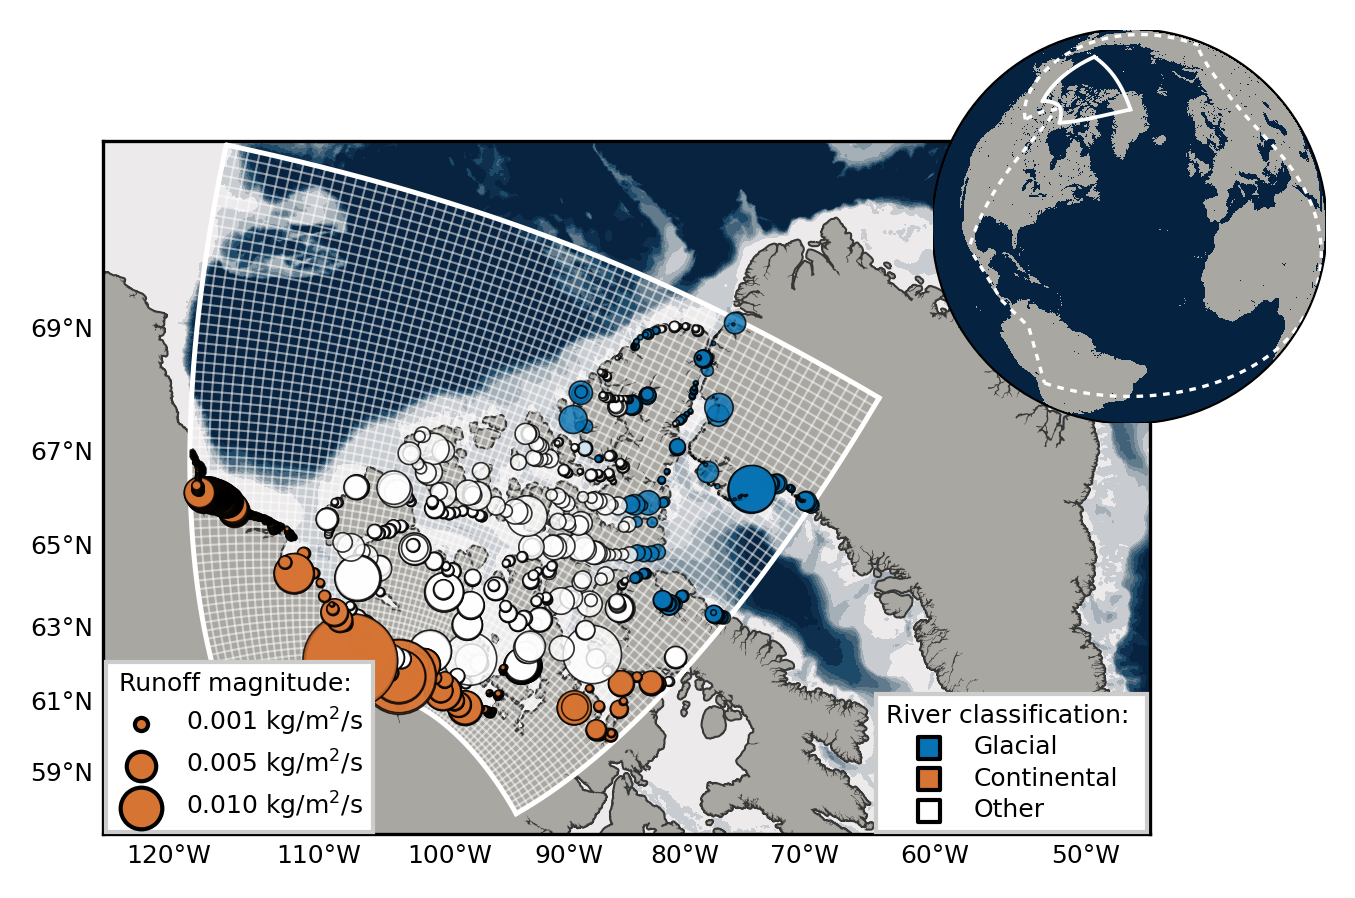

In [7]:
fig, ax1, proj1, ax2, proj2 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/rivers-map-globe.pickle','rb'))
# Globe: --------------------------------------------------------------------------------------
x, y  = proj2(lon_ANHA12, lat_ANHA12) 
# bath = proj2.contourf(x, y, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# Sub-domain
proj2.plot(x[imin:imax,jmin], y[imin:imax,jmin], 'w-', lw=0.9, zorder=3)
proj2.plot(x[imin:imax,jmax], y[imin:imax,jmax], 'w-', lw=0.9, zorder=3)
proj2.plot(x[imin,jmin:jmax], y[imin,jmin:jmax], 'w-', lw=0.9, zorder=3)
proj2.plot(x[imax,jmin:jmax], y[imax,jmin:jmax], 'w-', lw=0.9, zorder=3)
# full domain
proj2.plot(x[460:-1:grid_reso,0]   , y[460:-1:grid_reso,0]        , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[0,370:-1:grid_reso]   , y[0,370:-1:grid_reso]        , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[100:-1:grid_reso,-1]  , y[100:-1:grid_reso,-1]       , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
proj2.plot(x[-1,0:-1:grid_reso]    , y[-1,0:-1:grid_reso]         , 'w--', lw=0.8, zorder=3, dashes=(2, 2))
xline_add = [x[500,0], x[700,70], x[1100,0], x[0,370]]
yline_add = [y[240,-1], y[85,-80], y[80,0], y[0,370]]
proj2.plot(xline_add, yline_add, 'w--', lw=0.8, zorder=3, dashes=(2, 2))

# Sub-domain map: ---------------------------------------------------------------------------
x_sub, y_sub  = proj1(lon_ANHA12, lat_ANHA12) 
x_rf,    y_rf = proj1(model_lons, model_lats)

proj1.plot(x_sub[imin:imax,jmax]  , y_sub[imin:imax,jmax],   'w-', lw=1.2, zorder=3)
# proj1.plot(x_sub[imin:imax,jmax].T, y_sub[imin:imax,jmax].T, 'w-', lw=1.2, zorder=3)
proj1.plot(x_sub[imin:imax,jmin]  , y_sub[imin:imax,jmin],   'w-', lw=1.2, zorder=3)
# proj1.plot(x_sub[imin:imax,jmin].T, y_sub[imin:imax,jmin].T, 'w-', lw=1.2, zorder=3)
proj1.plot(x_sub[imin,jmin:jmax]  , y_sub[imin,jmin:jmax],   'w-', lw=1.2, zorder=3)
# proj1.plot(x_sub[imin,jmin:jmax].T, y_sub[imin,jmin:jmax].T, 'w-', lw=1.2, zorder=3)
proj1.plot(x_sub[imax,jmin:jmax]  , y_sub[imax,jmin:jmax],   'w-', lw=1.2, zorder=3)
# proj1.plot(x_sub[imax,jmin:jmax].T, y_sub[imax,jmin:jmax].T, 'w-', lw=1.2, zorder=3)

proj1.plot(x_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso], \
           y_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso], 'w-', lw=0.5, zorder=2, alpha=0.5);
proj1.plot(x_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso].T, \
           y_sub[imin:imax+10:grid_reso,jmin:jmax+10:grid_reso].T, 'w-', lw=0.5, zorder=2, alpha=0.5);

colormap = colors.ListedColormap([color_glacier, color_continent, color_other, color_other])
proj1.scatter(x_rf[imin:imax,jmin:jmax], y_rf[imin:imax,jmin:jmax], c=river_class[imin:imax,jmin:jmax],\
              s=rf[imin:imax,jmin:jmax]*1e4, alpha=0.8, cmap=colormap, edgecolor='k', linewidths=0.4, zorder=4)


#--- Legend ----------------------
for a in ['0.001', '0.005', '0.010']:
    proj1.scatter([], [], c=color_continent, alpha=1, s=float(a)*1e4, label=f'{a} kg/m$^2$/s', \
                  edgecolors='k', zorder=4)

l1 = ax1.legend(scatterpoints=1, frameon=True, framealpha=1, labelspacing=0.4, fontsize=6, loc=(0.002, 0.002), \
                fancybox=False, title='Runoff magnitude: ')
l1.get_title().set_fontsize('6')
g  = proj1.scatter([], [], c=color_glacier  , alpha=1, s=30, edgecolors='k', zorder=4, marker='s')
c  = proj1.scatter([], [], c=color_continent, alpha=1, s=30, edgecolors='k', zorder=4, marker='s')
o  = proj1.scatter([], [], c=color_other    , alpha=1, s=30, edgecolors='k', zorder=4, marker='s')
l2 = ax1.legend([g, c, o], ['Glacial', 'Continental', 'Other'], title='River classification: ', \
                scatterpoints=1, frameon=True, labelspacing=0.3, fontsize=6, loc=(0.738, 0.002), fancybox=False, framealpha=1)
l2.get_title().set_fontsize('6')
ax1.add_artist(l1)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/M1-river-class.png', bbox_inches='tight', dpi=300)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(4.5,3.0), dpi=300)

ax.plot(months, np.ones(len(months))*164 , '--', linewidth=1.3, c=color_glac)
ax.plot(months, np.ones(len(months))*29.8, '--', linewidth=1.3, c=color_cont)
ax.plot(months, np.ones(len(months))*2.2 , '--', linewidth=1.3, c=color_other)

ax.plot(months, np.ma.mean(dMn_rivers[:,river_class==1.0], axis=1)*1e9, '.-', \
        markeredgecolor='k', markersize=8, linewidth=2.0, c=color_glac, label='Glacial')
ax.plot(months, np.ma.mean(dMn_rivers[:,river_class==2.0], axis=1)*1e9, '.-', \
        markeredgecolor='k', markersize=8, linewidth=2.0, c=color_cont, label='Continental')
ax.plot(months, np.ma.mean(dMn_rivers[:,river_class==3.0], axis=1)*1e9, '.-', \
        markeredgecolor='k', markersize=8, linewidth=2.0, c=color_other, label='Other')

ax.set_ylim(-10,1700)
ax.set_xlabel('Month', fontsize=6)
ax.set_ylabel('Characteristic riverine Mn content [nmol/kg]', fontsize=6)
ax.tick_params(axis='both', labelsize=6, pad=-0.1)

leg = ax.legend(frameon=False, fontsize=6)
leg.set_title('River class:', prop={'size':6})
# fig.suptitle('Mean river Mn forcing climatology', fontsize=8)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/M2-seasonal-cycle.png', bbox_inches='tight', dpi=300)